# Compare_matrix_factorization

In [1]:
from pathlib import Path
import sys
import os.path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, gaussian_kde, mannwhitneyu, pearsonr, spearmanr
import seaborn as sns
from tqdm.notebook import tqdm
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

import json

from pymodulon.util import explained_variance
from pymodulon.imodulondb import imdb_gene_presence

%matplotlib inline
%config  InlineBackend.figure_format = 'png'

sns.set_style('whitegrid')

In [2]:
biocyc_info = pd.read_csv('../Data/biocyc_info.txt', sep="\t")

In [3]:
def map_accession_to_gene_name(df, biocyc_info):

    # Reset index if 'Accession' is the index, and rename the column
    if df.index.name == 'Accession' or df.index.name is None:
        df = df.reset_index()
        df.rename(columns={'index': 'Accession'}, inplace=True)
        
    # Merge with biocyc_info to map 'Accession' to 'Gene Name'
    merged_df = df.merge(biocyc_info[['Accession', 'Gene Name']], on='Accession', how='left')

    # Identify rows with NaN 'Gene Name'
    removed_indices = merged_df[merged_df['Gene Name'].isna()]['Accession'].tolist()

    # Print the original indices that were removed
    print("Original indices removed due to NaN 'Gene Name':", removed_indices)

    # Set 'Gene Name' as the new index and drop the 'Accession' column
    merged_df.set_index('Gene Name', inplace=True)
    merged_df.drop(columns=['Accession'], inplace=True)

    # Remove rows with NaN as index
    merged_df = merged_df[merged_df.index.notna()]
    
    return merged_df

## Read All Gene Presence Matrices

In [4]:
Dictionary_Learning_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Dictionary_Learning_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [5]:
Factor_Analysis_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Factor_Analysis_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [6]:
Fast_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Fast_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [7]:
Incremental_PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Incremental_PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [8]:
Independent_PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Independent_PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [9]:
InfoMax_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/InfoMax_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [10]:
Picard_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Picard_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [11]:
NMF_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/NMF_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [12]:
PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [13]:
Sparse_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Sparse_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [14]:
Sparse_Independent_PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Sparse_Independent_PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [15]:
SparseCoder_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/SparseCoder_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [16]:
Biclustering_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Biclustering_Presence_Matrix.csv", index_col=0).astype(int)

In [17]:
Corr_Hierarchical_Presence_Matrix = pd.read_csv("./Presence_Matrices/Corr_Hierarchical_Presence_Matrix.csv", index_col=0).astype(int)

In [18]:
GENIE3_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/GENIE3_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [149]:
WGCNA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/WGCNA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [197]:
FLAME_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/FLAME_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [198]:
QUBIC_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/QUBIC_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [199]:
ISA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/ISA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [19]:
RegulonDB_Gene_Presence_Matrix = pd.read_csv("../Data/RegulonDB_TRN_C_and_S.csv", index_col=0).astype(int)

## Map to gene name

In [20]:
Dictionary_Learning_Gene_Presence_Matrix = map_accession_to_gene_name(Dictionary_Learning_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [21]:
Factor_Analysis_Gene_Presence_Matrix = map_accession_to_gene_name(Factor_Analysis_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [22]:
Fast_ICA_Gene_Presence_Matrix = map_accession_to_gene_name(Fast_ICA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [23]:
Incremental_PCA_Gene_Presence_Matrix = map_accession_to_gene_name(Incremental_PCA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [24]:
Independent_PCA_Gene_Presence_Matrix = map_accession_to_gene_name(Independent_PCA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [25]:
InfoMax_ICA_Gene_Presence_Matrix = map_accession_to_gene_name(InfoMax_ICA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [26]:
Picard_ICA_Gene_Presence_Matrix = map_accession_to_gene_name(Picard_ICA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [27]:
NMF_Gene_Presence_Matrix = map_accession_to_gene_name(NMF_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [28]:
PCA_Gene_Presence_Matrix = map_accession_to_gene_name(PCA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [29]:
Sparse_ICA_Gene_Presence_Matrix = map_accession_to_gene_name(Sparse_ICA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [30]:
Sparse_Independent_PCA_Gene_Presence_Matrix = map_accession_to_gene_name(Sparse_Independent_PCA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [31]:
SparseCoder_Gene_Presence_Matrix = map_accession_to_gene_name(SparseCoder_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [32]:
Biclustering_Gene_Presence_Matrix = map_accession_to_gene_name(Biclustering_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [33]:
Corr_Hierarchical_Presence_Matrix = map_accession_to_gene_name(Corr_Hierarchical_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [34]:
GENIE3_Gene_Presence_Matrix = map_accession_to_gene_name(GENIE3_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [150]:
WGCNA_Gene_Presence_Matrix = map_accession_to_gene_name(WGCNA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [200]:
FLAME_Gene_Presence_Matrix = map_accession_to_gene_name(FLAME_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [201]:
QUBIC_Gene_Presence_Matrix = map_accession_to_gene_name(QUBIC_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [202]:
ISA_Gene_Presence_Matrix = map_accession_to_gene_name(ISA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [203]:
FLAME_Gene_Presence_Matrix = FLAME_Gene_Presence_Matrix.loc[
    FLAME_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [204]:
QUBIC_Gene_Presence_Matrix = QUBIC_Gene_Presence_Matrix.loc[
    QUBIC_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [205]:
ISA_Gene_Presence_Matrix = ISA_Gene_Presence_Matrix.loc[
    ISA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [35]:
Dictionary_Learning_Gene_Presence_Matrix = Dictionary_Learning_Gene_Presence_Matrix.loc[
    Dictionary_Learning_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [36]:
Factor_Analysis_Gene_Presence_Matrix = Factor_Analysis_Gene_Presence_Matrix.loc[
    Factor_Analysis_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [37]:
Fast_ICA_Gene_Presence_Matrix = Fast_ICA_Gene_Presence_Matrix.loc[
    Fast_ICA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [38]:
Incremental_PCA_Gene_Presence_Matrix = Incremental_PCA_Gene_Presence_Matrix.loc[
    Incremental_PCA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [39]:
Independent_PCA_Gene_Presence_Matrix = Independent_PCA_Gene_Presence_Matrix.loc[
    Independent_PCA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [40]:
InfoMax_ICA_Gene_Presence_Matrix = InfoMax_ICA_Gene_Presence_Matrix.loc[
    InfoMax_ICA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [41]:
Picard_ICA_Gene_Presence_Matrix = Picard_ICA_Gene_Presence_Matrix.loc[
    Picard_ICA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [42]:
NMF_Gene_Presence_Matrix = NMF_Gene_Presence_Matrix.loc[
    NMF_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [43]:
PCA_Gene_Presence_Matrix = PCA_Gene_Presence_Matrix.loc[
    PCA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [44]:
Sparse_ICA_Gene_Presence_Matrix = Sparse_ICA_Gene_Presence_Matrix.loc[
    Sparse_ICA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [45]:
Sparse_Independent_PCA_Gene_Presence_Matrix = Sparse_Independent_PCA_Gene_Presence_Matrix.loc[
    Sparse_Independent_PCA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [46]:
SparseCoder_Gene_Presence_Matrix = SparseCoder_Gene_Presence_Matrix.loc[
    SparseCoder_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [47]:
Biclustering_Gene_Presence_Matrix = Biclustering_Gene_Presence_Matrix.loc[
    Biclustering_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [48]:
Corr_Hierarchical_Presence_Matrix = Corr_Hierarchical_Presence_Matrix.loc[
    Corr_Hierarchical_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [49]:
GENIE3_Gene_Presence_Matrix = GENIE3_Gene_Presence_Matrix.loc[
    GENIE3_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [151]:
WGCNA_Gene_Presence_Matrix = WGCNA_Gene_Presence_Matrix.loc[
    WGCNA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [50]:
RegulonDB_Gene_Presence_Matrix = RegulonDB_Gene_Presence_Matrix.loc[
    RegulonDB_Gene_Presence_Matrix.index.isin(SparseCoder_Gene_Presence_Matrix.index)
]

In [51]:
RegulonDB_Gene_Presence_Matrix

,FecI,FliA,RpoD,RpoE,RpoH,RpoN,RpoS,AcrR,Ada,AdiY,...,YefM,YefMB,YgiV,YhaJ,YiaU,YjjQ,YqhC,ZntR,ZraR,Zur
aaeA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaeB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaeR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaeX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abgA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
znuC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zraP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
zraR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
zraS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Negentropy for PCA/ICA/IPCA/sIPCA/Regulon

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def logcosh(x):
    return np.log(np.cosh(x))

def calculate_logcosh_negentropy(column):
    # Normalize the data
    scaler = StandardScaler()
    normalized_column = scaler.fit_transform(column.values.reshape(-1, 1)).flatten()
    
    # Calculate the log-cosh of the column
    logcosh_values = logcosh(normalized_column)
    
    # Calculate the expected value (mean) of the log-cosh values
    mean_logcosh = np.mean(logcosh_values)
    
    # Calculate the expected value of the log-cosh for a standard Gaussian
    mean_logcosh_gaussian = np.mean(logcosh(np.random.randn(10000)))
    
    # Negentropy is the difference between these two expectations
    negentropy = mean_logcosh - mean_logcosh_gaussian
    return negentropy

def negentropy_per_column(df):
    negentropy_values = []
    for column in df.columns:
        negentropy = calculate_logcosh_negentropy(df[column]) * -1
        negentropy_values.append(negentropy)
    return np.array(negentropy_values)

def calculate_average_negentropy(dataframes_dict):
    # Create an empty list to store the results
    results = []

    for method_name, df in dataframes_dict.items():
        # Calculate the negentropy for each column
        negentropy_values = negentropy_per_column(df)
        
        # Calculate the average negentropy
        average_negentropy = np.mean(negentropy_values)
        
        # Append the result as a tuple (method name, average negentropy)
        results.append((method_name.replace('_Gene_Presence_Matrix', ''), abs(average_negentropy)))
    
    # Convert the results into a DataFrame
    negentropy_df = pd.DataFrame(results, columns=['Method', 'Average_Negentropy'])
    negentropy_df.set_index('Method', inplace=True)
    
    return negentropy_df

In [206]:
dataframes_dict = {
    "GENIE3_Gene_Presence_Matrix": GENIE3_Gene_Presence_Matrix,
    "WGCNA_Gene_Presence_Matrix": WGCNA_Gene_Presence_Matrix,
    "FLAME_Gene_Presence_Matrix": FLAME_Gene_Presence_Matrix,
    "QUBIC_Gene_Presence_Matrix": QUBIC_Gene_Presence_Matrix,
    "ISA_Gene_Presence_Matrix": ISA_Gene_Presence_Matrix,
    "PCA_Gene_Presence_Matrix": PCA_Gene_Presence_Matrix,
    "Incremental_PCA_Gene_Presence_Matrix": Incremental_PCA_Gene_Presence_Matrix,
    "Independent_PCA_Gene_Presence_Matrix": Independent_PCA_Gene_Presence_Matrix,
    "Sparse_Independent_PCA_Gene_Presence_Matrix": Sparse_Independent_PCA_Gene_Presence_Matrix,
    "Fast_ICA_Gene_Presence_Matrix": Fast_ICA_Gene_Presence_Matrix,
    "InfoMax_ICA_Gene_Presence_Matrix": InfoMax_ICA_Gene_Presence_Matrix,
    "Picard_ICA_Gene_Presence_Matrix": Picard_ICA_Gene_Presence_Matrix,
    "Sparse_ICA_Gene_Presence_Matrix": Sparse_ICA_Gene_Presence_Matrix,
    "NMF_Gene_Presence_Matrix": NMF_Gene_Presence_Matrix,
    "Factor_Analysis_Gene_Presence_Matrix": Factor_Analysis_Gene_Presence_Matrix,
    "Dictionary_Learning_Gene_Presence_Matrix": Dictionary_Learning_Gene_Presence_Matrix,
    "SparseCoder_Gene_Presence_Matrix": SparseCoder_Gene_Presence_Matrix,
    "RegulonDB_Gene_Presence_Matrix":RegulonDB_Gene_Presence_Matrix,
    "Randomized_RegulonDB_Gene_Presence_Matrix":Randomized_RegulonDB_Gene_Presence_Matrix
}

# Calculate the average negentropy for each DataFrame and return the result as a DataFrame
negentropy_df = calculate_average_negentropy(dataframes_dict)

In [207]:
negentropy_df

,Average_Negentropy
Method,
GENIE3,0.272017
WGCNA,0.328575
FLAME,0.322366
QUBIC,0.246928
ISA,0.275067
PCA,0.300759
Incremental_PCA,0.300416
Independent_PCA,0.298783
Sparse_Independent_PCA,0.300494


## Mutual Information

In [208]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import mutual_info_score

# Calculate mutual information scores
def calculate_mutual_information(df):
    mi_scores = []
    for col in df.columns:
        for col2 in df.columns:
            if col != col2:
                mi_scores.append(mutual_info_score(df[col], df[col2]))
    return np.array(mi_scores)

In [209]:
def calculate_average_mutual_information(dataframes_dict):
    # Create an empty list to store the results
    results = []

    for method_name, df in dataframes_dict.items():
        # Calculate the mutual information scores for each pair of columns
        mi_scores = calculate_mutual_information(df)
        
        # Calculate the average mutual information
        average_mi = np.mean(mi_scores)
        
        # Append the result as a tuple (method name, average mutual information)
        results.append((method_name.replace('_Gene_Presence_Matrix', ''), average_mi))
    
    # Convert the results into a DataFrame
    mi_df = pd.DataFrame(results, columns=['Method', 'Mutual_Information'])
    mi_df.set_index('Method', inplace=True)
    
    return mi_df

In [210]:
mutual_information_df = calculate_average_mutual_information(dataframes_dict)

## Normalized Mutual Information

In [212]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import normalized_mutual_info_score

# Calculate mutual information scores
def calculate_mutual_information(df):
    mi_scores = []
    for col in df.columns:
        for col2 in df.columns:
            if col != col2:
                mi_scores.append(normalized_mutual_info_score(df[col], df[col2]))
    return np.array(mi_scores)

In [213]:
def calculate_average_mutual_information(dataframes_dict):
    # Create an empty list to store the results
    results = []

    for method_name, df in dataframes_dict.items():
        # Calculate the mutual information scores for each pair of columns
        mi_scores = calculate_mutual_information(df)
        
        # Calculate the average mutual information
        average_mi = np.mean(mi_scores)
        
        # Append the result as a tuple (method name, average mutual information)
        results.append((method_name.replace('_Gene_Presence_Matrix', ''), average_mi))
    
    # Convert the results into a DataFrame
    mi_df = pd.DataFrame(results, columns=['Method', 'Normalized_Mutual_Information'])
    mi_df.set_index('Method', inplace=True)
    
    return mi_df

In [214]:
normalized_mutual_information_df = calculate_average_mutual_information(dataframes_dict)

In [215]:
normalized_mutual_information_df

,Normalized_Mutual_Information
Method,
GENIE3,0.016921
WGCNA,0.005199
FLAME,0.004423
QUBIC,0.090697
ISA,0.013328
PCA,0.018836
Incremental_PCA,0.018446
Independent_PCA,0.011325
Sparse_Independent_PCA,0.009358


## Sparsity

In [216]:
def calculate_sparsity_ratio(df, threshold=0):
    if threshold == 0:
        zero_elements = (df == 0).sum().sum()
    else:
        zero_elements = (np.abs(df) < threshold).sum().sum()
    total_elements = df.size
    sparsity_ratio = zero_elements / total_elements
    return sparsity_ratio

In [217]:
def calculate_average_sparsity_ratio(dataframes_dict, threshold=0):
    # Create an empty list to store the results
    results = []

    for method_name, df in dataframes_dict.items():
        # Calculate the sparsity ratio for the DataFrame
        sparsity_ratio = calculate_sparsity_ratio(df, threshold=threshold)
        
        # Append the result as a tuple (method name, sparsity ratio)
        results.append((method_name.replace('_Gene_Presence_Matrix', ''), sparsity_ratio))
    
    # Convert the results into a DataFrame
    sparsity_df = pd.DataFrame(results, columns=['Method', 'Sparsity_Ratio'])
    sparsity_df.set_index('Method', inplace=True)
    
    return sparsity_df

In [218]:
sparsity_ratio_df = calculate_average_sparsity_ratio(dataframes_dict, threshold=0)

In [219]:
sparsity_ratio_df

,Sparsity_Ratio
Method,
GENIE3,0.985463
WGCNA,0.996000
FLAME,0.996178
QUBIC,0.981173
ISA,0.986900
PCA,0.989809
Incremental_PCA,0.989745
Independent_PCA,0.989317
Sparse_Independent_PCA,0.990660


In [220]:
Numerical_Properties = pd.concat([negentropy_df, mutual_information_df, normalized_mutual_information_df, sparsity_ratio_df], axis=1)

In [248]:
Numerical_Properties

,Average_Negentropy,Mutual_Information,Normalized_Mutual_Information,Sparsity_Ratio
Method,,,,
GENIE3,0.272017,0.001730,0.016921,0.985463
WGCNA,0.328575,0.000000,0.005199,0.996000
FLAME,0.322366,0.000015,0.004423,0.996178
QUBIC,0.246928,0.008386,0.090697,0.981173
ISA,0.275067,0.001104,0.013328,0.986900
PCA,0.300759,0.000646,0.018836,0.989809
Incremental PCA,0.300416,0.000645,0.018446,0.989745
Independent PCA,0.298783,0.000403,0.011325,0.989317
Sparse Independent PCA,0.300494,0.000309,0.009358,0.990660


In [ ]:
Numerical_Properties = Numerical_Properties.drop(index='Randomized RegulonDB')

In [222]:
Numerical_Properties.index = Numerical_Properties.index.str.replace('_', ' ')

In [249]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def plot_average_negentropy(df):
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(5, 3))
    
    # Plot for Average_Negentropy
    ax.bar(df.index, df['Average_Negentropy'], color='#F6CD82')
    
    # Set the x-tick positions and labels to the method names
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, fontproperties=font_prop, rotation=45, ha="right")
    
    # Apply the font to y-axis ticks
    ax.yaxis.set_tick_params(labelsize=12)  # Optionally, set tick size
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    
    # Add title and labels
    # ax.set_title("Average Negentropy", fontproperties=font_prop)
    ax.set_title("", fontproperties=font_prop)
    
    # Remove grid lines
    ax.grid(False)
    
    # Add a width=1 box around the plot
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    
    # Display the plot
    plt.tight_layout()
    plt.savefig('plot_average_negentropy.svg', format = 'svg')
    plt.show()

def plot_normalized_mutual_information(df):
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(5, 3))
    
    # Plot for Mutual_Information with a label for the legend
    ax.bar(df.index, df['Normalized_Mutual_Information'], color='#B999C8', label='Normalized Mutual Information')
    
    # Set the x-tick positions and labels to the method names
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, fontproperties=font_prop, rotation=45, ha="right")
    
    # Apply the font to y-axis ticks
    ax.yaxis.set_tick_params(labelsize=12)  # Optionally, set tick size
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    
    # Add title and labels
    # ax.set_title("Mutual Information", fontproperties=font_prop)
    ax.set_title("", fontproperties=font_prop)
    
    # Remove grid lines
    ax.grid(False)
    
    # Customize the spines to have a black border with linewidth=1
    for spine in ax.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')  # Ensure the border color is black
    
    # Add a legend to the plot
    ax.legend(prop=font_prop, fontsize=12)
    
    # Display the plot
    plt.tight_layout()
    plt.savefig('plot_Normalized_mutual_information.svg', format='svg')
    plt.show()
    
def plot_sparsity_ratio(df):
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(5, 3))
    
    # Plot for Sparsity_Ratio
    ax.bar(df.index, df['Sparsity_Ratio'], color='#B8D8A9')
    
    # Set the x-tick positions and labels to the method names
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, fontproperties=font_prop, rotation=45, ha="right")
    
    # Apply the font to y-axis ticks
    ax.yaxis.set_tick_params(labelsize=12)  # Optionally, set tick size
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    
    # Add title and labels
    ax.set_title("Sparsity Ratio", fontproperties=font_prop)
    
    # Remove grid lines
    ax.grid(False)
    
    # Add a width=1 box around the plot
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

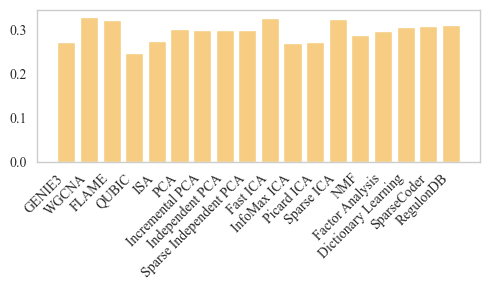

In [245]:
plot_average_negentropy(Numerical_Properties)

In [251]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

def plot_mutual_information(df):
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # Separate the 'RegulonDB' row from the rest of the DataFrame
    df_main = df.drop('RegulonDB')
    df_regulon = df.loc[['RegulonDB']]

    # Create subplots with shared y-axis to ensure the same y-scale
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(7, 2), gridspec_kw={'width_ratios': [len(df_main), 1]}, sharey=True)

    # Plot for Mutual Information for all rows except 'RegulonDB'
    ax.bar(df_main.index, df_main['Mutual_Information'], color='#B999C8', label='Mutual Information')

    # Set the x-tick positions and labels for the main plot
    ax.set_xticks(range(len(df_main.index)))
    ax.set_xticklabels(df_main.index, fontproperties=font_prop, rotation=45, ha="right")
    ax.set_yticks([0, 0.001, 0.002, 0.003, 0.004])  # Adjust values based on your data
    ax.yaxis.set_tick_params(labelsize=12)
    # Apply the font to y-axis ticks for the main plot
    ax.yaxis.set_tick_params(labelsize=12)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)

    # Title (optional)
    ax.set_title("", fontproperties=font_prop)

    # Remove grid lines for the main plot
    ax.grid(False)

    # Customize the spines for the main plot
    for spine in ax.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')

    # Add a legend to the main plot
    ax.legend(prop=font_prop, fontsize=12)

    # Plot the 'RegulonDB' bar in ax2, sharing the y-axis with ax
    ax2.bar('RegulonDB', df_regulon['Mutual_Information'], color='#94c47d')

    # Remove y-ticks for the 'RegulonDB' box but keep the y-scale aligned
    ax2.tick_params(left=False)  # This hides the y-ticks

    # Set x-tick labels for 'RegulonDB' box with the appropriate font
    ax2.set_xticks([0])
    ax2.set_xticklabels(['RegulonDB'], fontproperties=font_prop, rotation=45, ha="center")

    # Customize the spines for the 'RegulonDB' box
    for spine in ax2.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')

    # Remove grid lines for 'RegulonDB' box
    ax2.grid(False)

    # Adjust layout for better fit and smaller gap between the plots
    plt.subplots_adjust(wspace=0.05, left=0.1, right=0.9, top=0.9, bottom=0.3)

    # Save and display the plot
    plt.savefig('plot_mutual_information.svg', format='svg')
    plt.show()

# Example usage assuming you have a DataFrame `df`
# plot_mutual_information(df)


In [261]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

def plot_mutual_information(df):
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # Separate the 'RegulonDB' row from the rest of the DataFrame
    df_main = df.drop('RegulonDB')
    df_regulon = df.loc[['RegulonDB']]

    # Create subplots with shared y-axis to ensure the same y-scale
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(6, 2.3), gridspec_kw={'width_ratios': [len(df_main), 1]}, sharey=True)

    # Plot for Mutual Information for all rows except 'RegulonDB'
    ax.bar(df_main.index, df_main['Mutual_Information'], color='#B999C8', label='Mutual Information (log)')

    # Remove all x-ticks for the main plot
    ax.set_xticks([])  # Removes x-ticks
    ax.tick_params(axis='x', bottom=False)  # Hides x-axis ticks

    # Set y-ticks and apply the font to y-axis ticks
    ax.set_yscale('log')
    # ax.set_yticks([0, 0.001, 0.002, 0.003, 0.004])
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)

    # Title (optional)
    ax.set_title("", fontproperties=font_prop)

    # Remove grid lines for the main plot
    ax.grid(False)

    # Customize the spines for the main plot
    for spine in ax.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')

    # Add a legend to the main plot
    ax.legend(prop=font_prop, fontsize=12)

    # Plot the 'RegulonDB' bar in ax2
    ax2.bar('RegulonDB', df_regulon['Mutual_Information'], color='#94c47d')

    # Remove all x-ticks for the 'RegulonDB' box
    ax2.set_xticks([])  # Removes x-ticks
    ax2.tick_params(axis='x', bottom=False)  # Hides x-axis ticks

    # Customize the spines for the 'RegulonDB' box
    for spine in ax2.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')

    # Remove grid lines for 'RegulonDB' box
    ax2.grid(False)

    # Adjust layout for better fit and smaller gap between the plots
    plt.subplots_adjust(wspace=0.05, left=0.1, right=0.9, top=0.9, bottom=0.3)

    # Save and display the plot
    plt.savefig('plot_mutual_information.svg', format='svg')
    plt.show()

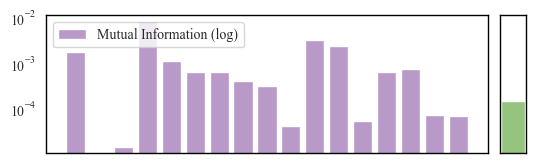

In [262]:
plot_mutual_information(Numerical_Properties)

## Sparsity plot

## Read All Gene Presence Matrices

In [266]:
Dictionary_Learning_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Dictionary_Learning_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [267]:
Factor_Analysis_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Factor_Analysis_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [268]:
Fast_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Fast_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [269]:
Incremental_PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Incremental_PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [270]:
Independent_PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Independent_PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [271]:
InfoMax_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/InfoMax_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [272]:
Picard_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Picard_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [273]:
NMF_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/NMF_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [274]:
PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [275]:
Sparse_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Sparse_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [276]:
Sparse_Independent_PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Sparse_Independent_PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [277]:
SparseCoder_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/SparseCoder_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [278]:
Biclustering_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Biclustering_Presence_Matrix.csv", index_col=0).astype(int)

In [279]:
Corr_Hierarchical_Presence_Matrix = pd.read_csv("./Presence_Matrices/Corr_Hierarchical_Presence_Matrix.csv", index_col=0).astype(int)

In [280]:
GENIE3_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/GENIE3_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [281]:
WGCNA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/WGCNA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [282]:
FLAME_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/FLAME_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [283]:
QUBIC_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/QUBIC_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [284]:
ISA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/ISA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [285]:
RegulonDB_Gene_Presence_Matrix = pd.read_csv("../Data/RegulonDB_TRN_C_and_S.csv", index_col=0).astype(int)

In [286]:
dataframes_dict = {
    "GENIE3_Gene_Presence_Matrix": GENIE3_Gene_Presence_Matrix,
    "WGCNA_Gene_Presence_Matrix": WGCNA_Gene_Presence_Matrix,
    "FLAME_Gene_Presence_Matrix": FLAME_Gene_Presence_Matrix,
    "QUBIC_Gene_Presence_Matrix": QUBIC_Gene_Presence_Matrix,
    "ISA_Gene_Presence_Matrix": ISA_Gene_Presence_Matrix,
    "PCA_Gene_Presence_Matrix": PCA_Gene_Presence_Matrix,
    "Incremental_PCA_Gene_Presence_Matrix": Incremental_PCA_Gene_Presence_Matrix,
    "Independent_PCA_Gene_Presence_Matrix": Independent_PCA_Gene_Presence_Matrix,
    "Sparse_Independent_PCA_Gene_Presence_Matrix": Sparse_Independent_PCA_Gene_Presence_Matrix,
    "Fast_ICA_Gene_Presence_Matrix": Fast_ICA_Gene_Presence_Matrix,
    "InfoMax_ICA_Gene_Presence_Matrix": InfoMax_ICA_Gene_Presence_Matrix,
    "Picard_ICA_Gene_Presence_Matrix": Picard_ICA_Gene_Presence_Matrix,
    "Sparse_ICA_Gene_Presence_Matrix": Sparse_ICA_Gene_Presence_Matrix,
    "NMF_Gene_Presence_Matrix": NMF_Gene_Presence_Matrix,
    "Factor_Analysis_Gene_Presence_Matrix": Factor_Analysis_Gene_Presence_Matrix,
    "Dictionary_Learning_Gene_Presence_Matrix": Dictionary_Learning_Gene_Presence_Matrix,
    "SparseCoder_Gene_Presence_Matrix": SparseCoder_Gene_Presence_Matrix,
    "RegulonDB_Gene_Presence_Matrix":RegulonDB_Gene_Presence_Matrix
}

In [287]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

def plot_average_genes(dataframes_dict):
    # Create a dictionary to store the average number of 1s for each dataframe
    averages_dict = {}

    # Iterate over the dictionary of DataFrames
    for name, df in dataframes_dict.items():
        # Calculate the average number of 1s in each column, then take the mean of those averages
        average_ones = df.sum().mean()
        averages_dict[name] = average_ones

    # Convert the dictionary to a DataFrame for plotting
    averages_df = pd.DataFrame.from_dict(averages_dict, orient='index', columns=['Average_Genes'])

    # Clean up the index labels (remove "_Presence_Matrix" and replace "_" with " ")
    averages_df.index = averages_df.index.str.replace('_Gene_Presence_Matrix', '', regex=False).str.replace('_', ' ', regex=False)

    # Separate the 'RegulonDB' row from the rest of the DataFrame for special handling
    df_main = averages_df.drop('RegulonDB')
    df_regulon = averages_df.loc[['RegulonDB']]

    # Plotting
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # Create subplots with shared y-axis
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(6, 2.3), gridspec_kw={'width_ratios': [len(df_main), 1]}, sharey=True)

    # Plot for Average Genes for all rows except 'RegulonDB'
    ax.bar(df_main.index, df_main['Average_Genes'], color='#f6cd82', label='Average Number of Genes in Components')

    # Set the x-tick positions and labels for the main plot
    ax.set_xticks(range(len(df_main.index)))
    ax.set_xticklabels(df_main.index, fontproperties=font_prop, rotation=50, ha="right")

    # Apply the font to y-axis ticks for the main plot (with labels now displayed)
    ax.yaxis.set_tick_params(labelsize=12)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    # Title (optional)
    ax.set_title("", fontproperties=font_prop)

    # Remove grid lines for the main plot
    ax.grid(False)

    # Customize the spines for the main plot
    for spine in ax.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')

    # Add a legend to the main plot
    ax.legend(prop=font_prop, fontsize=12)

    # Plot the 'RegulonDB' bar in ax2, sharing the y-axis with ax
    ax2.bar('RegulonDB Gene', df_regulon['Average_Genes'], color='#94c47d')

    # Set the x-tick labels for 'RegulonDB' box with the appropriate font
    ax2.set_xticks([0])
    ax2.set_xticklabels(['RegulonDB'], fontproperties=font_prop, rotation=50, ha="center")

    # Customize the spines for the 'RegulonDB' box
    for spine in ax2.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')

    # Remove grid lines for 'RegulonDB' box
    ax2.grid(False)

    # Adjust layout for better fit and smaller gap between the plots
    plt.subplots_adjust(wspace=0.05, left=0.1, right=0.9, top=0.9, bottom=0.3)

    # Save and display the plot
    plt.savefig('plot_average_genes.svg', format='svg')
    plt.show()

# Usage
# Assuming the dataframes_dict is defined as you provided, you can call the function as:
# plot_average_genes(dataframes_dict)


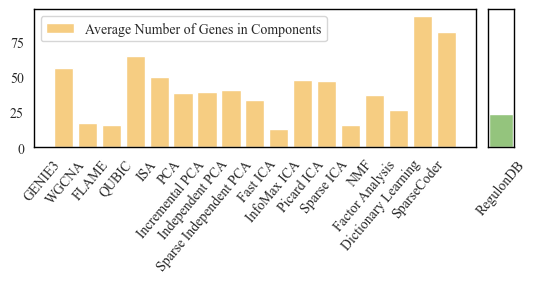

In [288]:
plot_average_genes(dataframes_dict)

In [289]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

def plot_gene_component_presence(dataframes_dict):
    # Create a dictionary to store the average component presence for each DataFrame
    gene_presence_dict = {}

    # Iterate over the dictionary of DataFrames
    for name, df in dataframes_dict.items():
        # Sum along the rows to get the presence count of each gene across components
        gene_presence = df.sum(axis=1).mean()
        gene_presence_dict[name] = gene_presence

    # Convert the dictionary to a DataFrame for plotting
    presence_df = pd.DataFrame.from_dict(gene_presence_dict, orient='index', columns=['Gene_Component_Presence'])

    # Clean up the index labels (remove "_Presence_Matrix" and replace "_" with " ")
    presence_df.index = presence_df.index.str.replace('_Gene_Presence_Matrix', '', regex=False).str.replace('_', ' ', regex=False)

    # Separate the 'RegulonDB' row from the rest of the DataFrame for special handling
    df_main = presence_df.drop('RegulonDB')
    df_regulon = presence_df.loc[['RegulonDB']]

    # Plotting
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # Create subplots with shared y-axis
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(7, 2), gridspec_kw={'width_ratios': [len(df_main), 1]}, sharey=True)

    # Plot for Gene Component Presence for all rows except 'RegulonDB'
    ax.bar(df_main.index, df_main['Gene_Component_Presence'], color='#f6cd82', label='Average Component Presence per Gene')

    # Set the x-tick positions and labels for the main plot
    ax.set_xticks(range(len(df_main.index)))
    ax.set_xticklabels(df_main.index, fontproperties=font_prop, rotation=45, ha="right")

    # Apply the font to y-axis ticks for the main plot (with labels now displayed)
    ax.yaxis.set_tick_params(labelsize=12)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    # Title (optional)
    ax.set_title("", fontproperties=font_prop)

    # Remove grid lines for the main plot
    ax.grid(False)

    # Customize the spines for the main plot
    for spine in ax.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')

    # Add a legend to the main plot
    ax.legend(prop=font_prop, fontsize=12)

    # Plot the 'RegulonDB' bar in ax2, sharing the y-axis with ax
    ax2.bar('RegulonDB Gene', df_regulon['Gene_Component_Presence'], color='#94c47d')

    # Set the x-tick labels for 'RegulonDB' box with the appropriate font
    ax2.set_xticks([0])
    ax2.set_xticklabels(['RegulonDB'], fontproperties=font_prop, rotation=45, ha="center")

    # Customize the spines for the 'RegulonDB' box
    for spine in ax2.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')

    # Remove grid lines for 'RegulonDB' box
    ax2.grid(False)

    # Adjust layout for better fit and smaller gap between the plots
    plt.subplots_adjust(wspace=0.05, left=0.1, right=0.9, top=0.9, bottom=0.3)

    # Save and display the plot
    plt.savefig('gene_component_presence.svg', format='svg')
    plt.show()

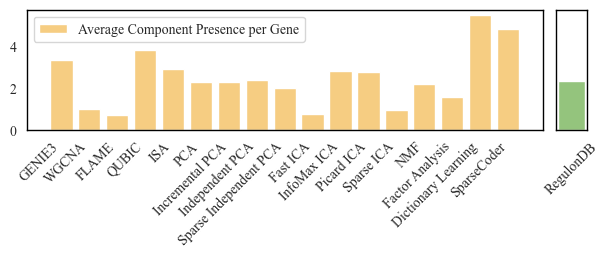

In [290]:
plot_gene_component_presence(dataframes_dict)

In [294]:
def count_the_number_of_genes_covered(matrix):
    return (matrix.sum(axis=1) > 0).sum()

In [296]:
count_the_number_of_genes_covered(GENIE3_Gene_Presence_Matrix)

2569

In [297]:
count_the_number_of_genes_covered(WGCNA_Gene_Presence_Matrix)

4257

In [298]:
count_the_number_of_genes_covered(FLAME_Gene_Presence_Matrix)

3076

In [300]:
count_the_number_of_genes_covered(QUBIC_Gene_Presence_Matrix)

1335

In [301]:
count_the_number_of_genes_covered(ISA_Gene_Presence_Matrix)

2803

In [302]:
count_the_number_of_genes_covered(PCA_Gene_Presence_Matrix)

4042

In [299]:
count_the_number_of_genes_covered(Fast_ICA_Gene_Presence_Matrix)

2253

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_component_distribution(df):
    """
    Plots the distribution of the number of components that a gene is present in.

    Parameters:
        df (pd.DataFrame): DataFrame with components as columns, 
                           genes as rows, and 1/0 values indicating presence/absence.
    """
    # Sum across the rows to get the number of components each gene is present in
    component_counts = df.sum(axis=1)

    # Get the frequency distribution of these counts
    frequency_distribution = component_counts.value_counts().sort_index()

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 3))

    ax.bar(frequency_distribution.index, frequency_distribution.values, color='#4c72b0')

    # Set x and y labels
    ax.set_xlabel('Number of Components a Gene is Present In', fontsize=12)
    ax.set_ylabel('Frequency of Genes', fontsize=12)
    ax.set_title('Distribution of Genes across Components', fontsize=14)

    # Set x-ticks to be integer values only
    ax.set_xticks(frequency_distribution.index)

    # Customize the spines
    for spine in ax.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')

    # Adjust layout
    plt.tight_layout()

    plt.show()

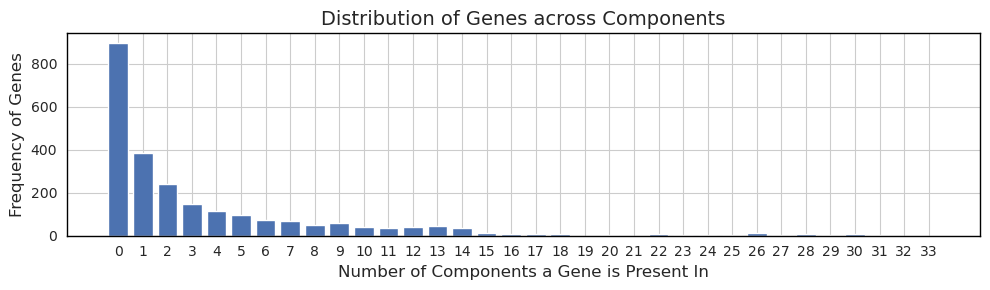

In [132]:
plot_component_distribution(GENIE3_Gene_Presence_Matrix)

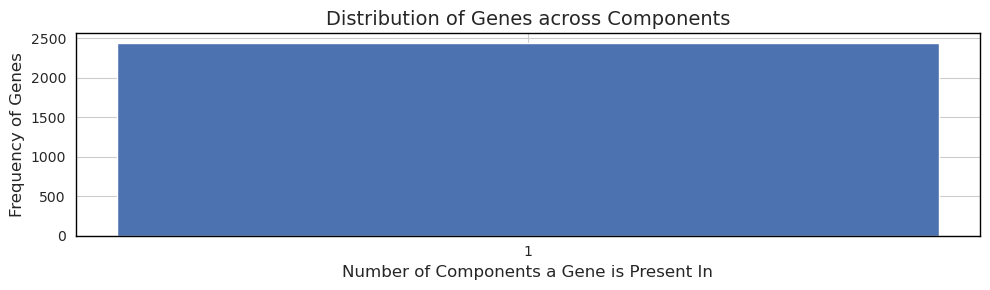

In [133]:
plot_component_distribution(Biclustering_Gene_Presence_Matrix)

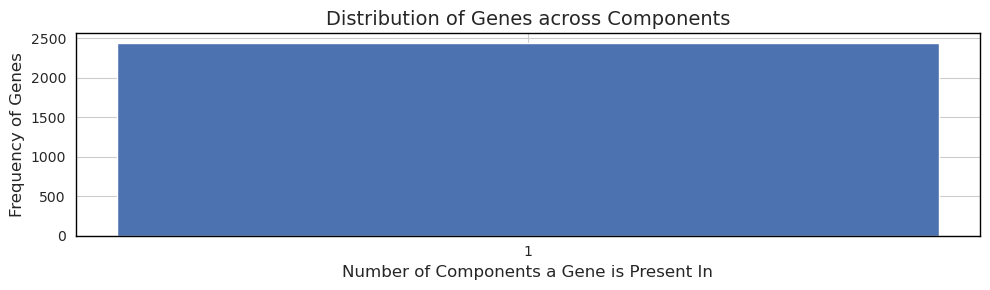

In [134]:
plot_component_distribution(Corr_Hierarchical_Presence_Matrix)

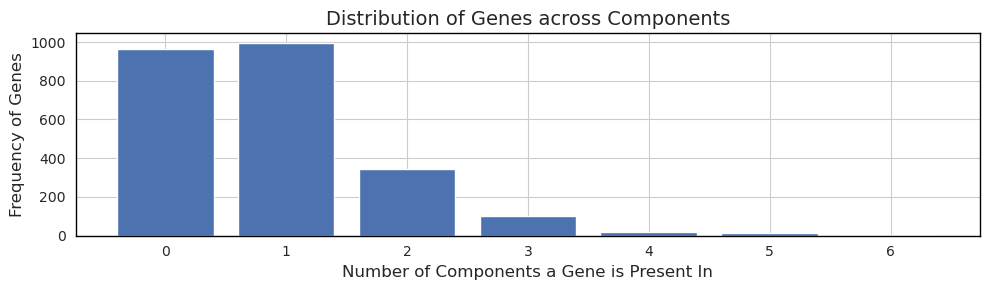

In [135]:
plot_component_distribution(Fast_ICA_Gene_Presence_Matrix)

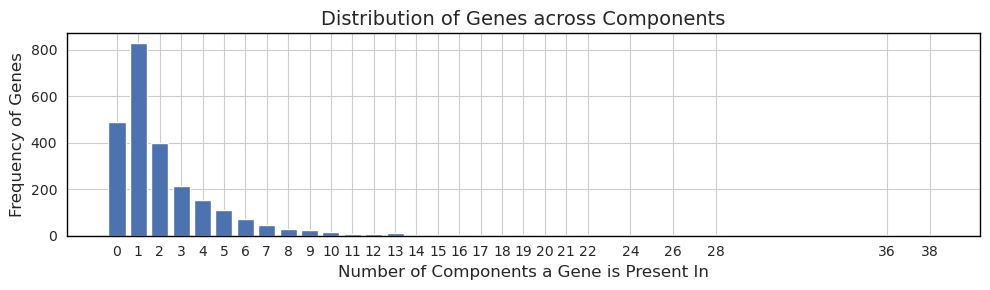

In [136]:
plot_component_distribution(Sparse_Independent_PCA_Gene_Presence_Matrix)